     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

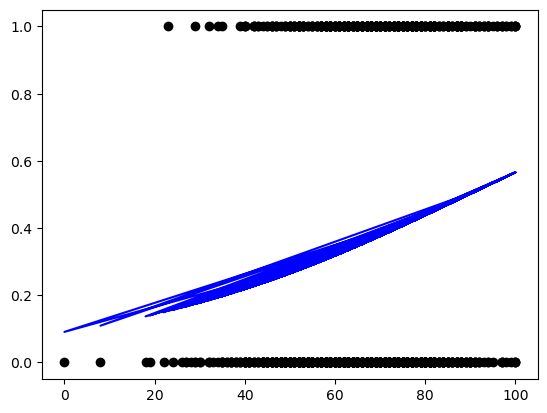

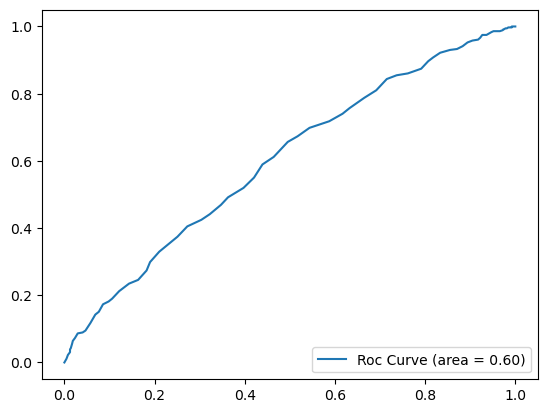

######- Linear Classification - #######
Accuracy Score:  0.648

Confusion Matrix  [[616  26]
 [326  32]]

Classification report                precision    recall  f1-score   support

           0       0.65      0.96      0.78       642
           1       0.55      0.09      0.15       358

    accuracy                           0.65      1000
   macro avg       0.60      0.52      0.47      1000
weighted avg       0.62      0.65      0.55      1000


 ROC AUC Score:  0.6022207139003464

#######- Nonlinear Classification- #######
Train Accuracy with Poly_degree 1: 0.64625
Test Accuracy with Poly_degree 1: 0.645

Train Accuracy with Poly_degree 2: 0.64625
Test Accuracy with Poly_degree 2: 0.645

Train Accuracy with Poly_degree 3: 0.64625
Test Accuracy with Poly_degree 3: 0.645

Train Accuracy with Poly_degree 4: 0.64875
Test Accuracy with Poly_degree 4: 0.645

Train Accuracy with Poly_degree 5: 0.65375
Test Accuracy with Poly_degree 5: 0.655


Train - Accuracy Score:  0.64625
Train - C

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

df = pd.read_csv('C:/Users/Admin/Documents/StudentsPerformance.csv')
print(df)
df.columns = df.columns.str.replace(' ', '_')

df.test_preparation_course = np.where(df.test_preparation_course=='none', 0, 1)

x = df[['math_score']]
y = df['test_preparation_course']

model = lm.LogisticRegression(C=1)
model.fit(x, y)
plt.scatter

plt.scatter(x, y, color='black')
plt.plot(x, model.predict_proba(x)[:, 1], color='blue')
plt.show()

fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:, 1])
roc_auc = metrics.auc(fpt, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Roc Curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.show()

print('######- Linear Classification - #######')
print('Accuracy Score: ', metrics.accuracy_score(y, model.predict(x)))
print('\nConfusion Matrix ', metrics.confusion_matrix(y, model.predict(x)))
print('\nClassification report ', metrics.classification_report(y, model.predict(x)))
print('\n ROC AUC Score: ', metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))


#Nonlinear Classification Evaluation
print('\n#######- Nonlinear Classification- #######')
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=0)
model.fit(x_train, y_train)

lr = lm.LogisticRegression()
for i in range(1, 6):
    model = make_pipeline(PolynomialFeatures(i), lr)
    model.fit(x_train, y_train)
    print(f'Train Accuracy with Poly_degree {i}: {metrics.accuracy_score(y_train, model.predict(x_train))}')
    print(f'Test Accuracy with Poly_degree {i}: {metrics.accuracy_score(y_test, model.predict(x_test))}\n')

lr = lm.LogisticRegression(penalty='l1', solver='saga', random_state=0)
model = make_pipeline(PolynomialFeatures(4), lr)
model.fit(x_train, y_train)

print('\nTrain - Accuracy Score: ', metrics.accuracy_score(y_train, model.predict(x_train)))
print('Train - Confusion Matrix: ', metrics.confusion_matrix(y_train, model.predict(x_train)))
print('Train - Classification Report: ', metrics.classification_report(y_train, model.predict(x_train)))

print('\nTest Accuracy Score: ', metrics.accuracy_score(y_test, model.predict(x_test)))
print('Test Confusion Matrix: ', metrics.confusion_matrix(y_test, model.predict(x_test)))
print('Test Classification Report: ', metrics.classification_report(y_test, model.predict(x_test)))

x = sm.add_constant(x)

model = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(model.summary())